In [1]:
import tensorflow as tf

import pandas as pd

In [2]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

In [3]:
import os 

In [4]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv", cache_subdir=os.getcwd())
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv",cache_subdir=os.getcwd())

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

2194/2194 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step


In [5]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [6]:
train_y = train.pop('Species')
test_y = test.pop('Species')

# The label column has now been removed from the features.
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [7]:
import numpy as np

In [ ]:
def input_evaluation_set():
    features = {'SepalLength': np.array([6.4, 5.0]),
                'SepalWidth':  np.array([2.8, 2.3]),
                'PetalLength': np.array([5.6, 3.3]),
                'PetalWidth':  np.array([2.2, 1.0])}
    labels = np.array([2, 1])
    return features, labels

In [ ]:
# features = {'SepalLength': np.array([6.4, 5.0]),
#                 'SepalWidth':  np.array([2.8, 2.3]),
#                 'PetalLength': np.array([5.6, 3.3]),
#                 'PetalWidth':  np.array([2.2, 1.0])}
# labels = np.array([2, 1])

In [10]:
def input_fn(features, labels, training=True, batch_size=256):
    """An input function for training or evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)

In [11]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [12]:
my_feature_columns

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [15]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

AttributeError: module 'tensorflow' has no attribute 'estimator'

In [14]:
# Train the Model.
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)

NameError: name 'classifier' is not defined

In [16]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

In [17]:
import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [18]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [19]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [20]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [24]:
dftrain.shape

(627, 9)

In [25]:
dfeval.shape

(264, 9)

here are 627 and 264 examples in the training and evaluation sets, respectively.

Explore the data

<Axes: >

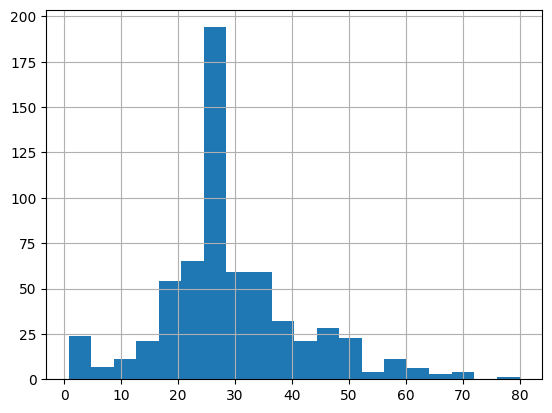

In [ ]:
# The majority of passengers are in their 20's and 30's.
dftrain.age.hist(bins=20) # no of bar 20

<Axes: >

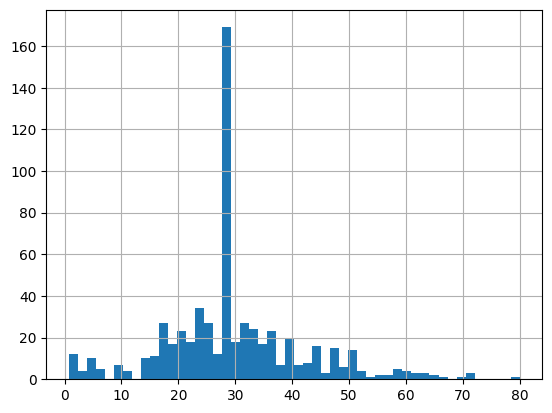

In [ ]:
# The majority of passengers are in their 20's and 30's.
dftrain.age.hist(bins=50) # no of bar 50

<Axes: >

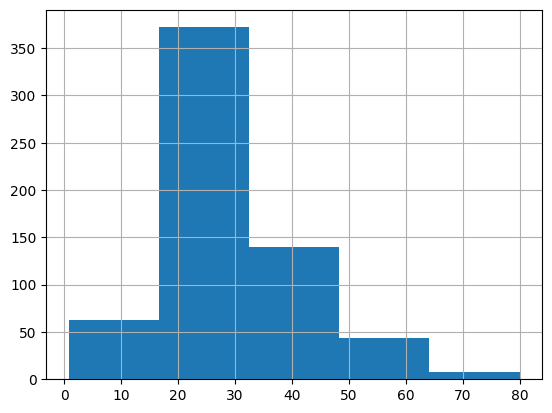

In [ ]:
# The majority of passengers are in their 20's and 30's.
dftrain.age.hist(bins=5) # no of bar 5

There are approximately twice as many male passengers as female passengers aboard

<Axes: ylabel='sex'>

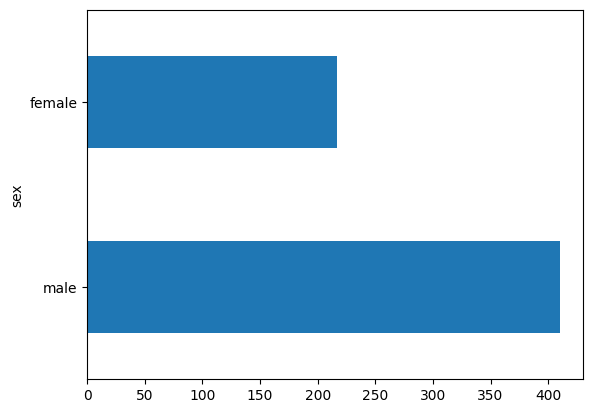

In [29]:
dftrain.sex.value_counts().plot(kind='barh')

The majority of passengers were in the "third" class.

<Axes: ylabel='class'>

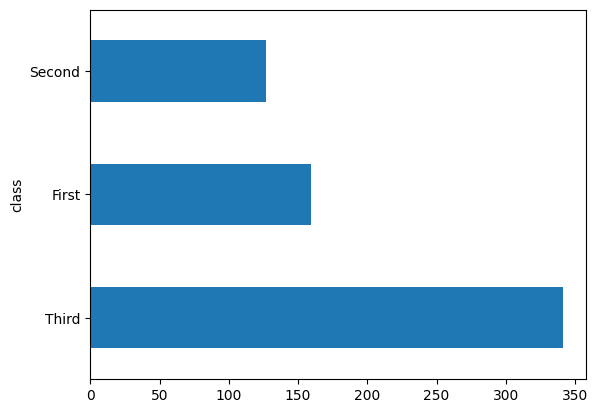

In [30]:
dftrain['class'].value_counts().plot(kind='barh')

Females have a much higher chance of surviving versus males. This is clearly a predictive feature for the model.

In [32]:
pd.concat([dftrain, y_train], axis=1)

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone,survived
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n,0
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n,1
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y,1
3,female,35.0,1,0,53.1000,First,C,Southampton,n,1
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y,0
...,...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y,0
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y,0
624,female,19.0,0,0,30.0000,First,B,Southampton,y,1
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n,0


In [33]:
pd.concat([dftrain, y_train], axis=1).groupby('sex')

In [35]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.value_counts()

sex     survived
female  1           169
        0            48
male    0           336
        1            74
Name: count, dtype: int64

Text(0.5, 0, '% survive')

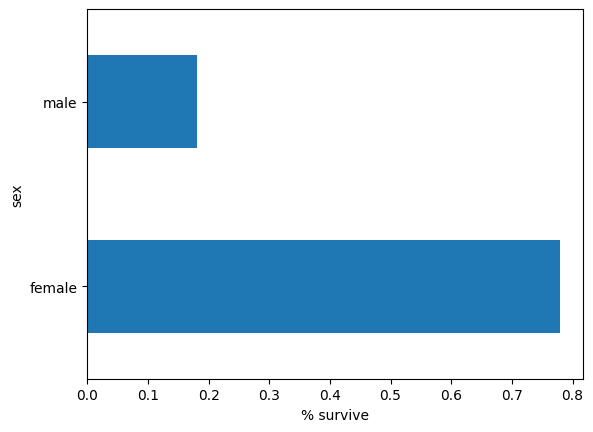

In [31]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

Feature Engineering for the Mode

In [36]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

In [38]:
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  print(vocabulary)
  f_c =tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)
  print(f_c)


['male' 'female']
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
[1 0 3 4 2 5 8]
VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)
[0 1 2 5 3 4]
VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0)
['Third' 'First' 'Second']
VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
['unknown' 'C' 'G' 'A' 'B' 'D' 'F' 'E']
VocabularyListCategoricalColumn(key='deck', vocabulary_l

In [39]:


feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [40]:
feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

In [41]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [ ]:
tr_input = train_input_fn()

In [53]:
tr_input

<_RepeatDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'n_siblings_spouses': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'parch': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'deck': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'embark_town': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'alone': TensorSpec(shape=(None,), dtype=tf.string, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [51]:
next(iter(tr_input.take(1)))

({'sex': <tf.Tensor: shape=(32,), dtype=string, numpy=
  array([b'female', b'male', b'male', b'female', b'male', b'female',
         b'male', b'male', b'female', b'female', b'female', b'male',
         b'male', b'male', b'female', b'female', b'male', b'female',
         b'male', b'male', b'female', b'female', b'female', b'male',
         b'male', b'male', b'male', b'female', b'male', b'male', b'male',
         b'female'], dtype=object)>,
  'age': <tf.Tensor: shape=(32,), dtype=float64, numpy=
  array([21., 27., 24.,  7., 49., 22.,  3., 45., 58., 22., 53., 25., 28.,
         46., 63., 17., 30., 26., 20., 46., 38., 22., 57., 30.,  2., 28.,
         19., 28., 28., 33., 29., 30.])>,
  'n_siblings_spouses': <tf.Tensor: shape=(32,), dtype=int64, numpy=
  array([0, 0, 2, 0, 1, 0, 4, 1, 0, 0, 2, 1, 0, 1, 1, 4, 0, 1, 0, 0, 1, 0,
         0, 0, 3, 0, 0, 1, 0, 1, 0, 0], dtype=int64)>,
  'parch': <tf.Tensor: shape=(32,), dtype=int64, numpy=
  array([0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 

In [ ]:
next(iter(tr_input.take(1)))[0] # feature

{'sex': <tf.Tensor: shape=(32,), dtype=string, numpy=
 array([b'male', b'male', b'male', b'female', b'male', b'male', b'female',
        b'male', b'male', b'female', b'female', b'female', b'female',
        b'male', b'male', b'male', b'male', b'male', b'male', b'male',
        b'male', b'male', b'male', b'male', b'female', b'male', b'male',
        b'male', b'female', b'female', b'female', b'male'], dtype=object)>,
 'age': <tf.Tensor: shape=(32,), dtype=float64, numpy=
 array([ 2.  , 28.  , 47.  , 28.  , 28.  , 27.  , 29.  , 47.  , 28.  ,
         0.75, 34.  , 29.  , 16.  ,  3.  , 28.  , 28.  , 18.  , 28.  ,
        40.  , 26.  , 43.  , 51.  , 10.  , 16.  , 15.  , 39.  , 47.  ,
        46.  , 45.  ,  7.  ,  0.75, 19.  ])>,
 'n_siblings_spouses': <tf.Tensor: shape=(32,), dtype=int64, numpy=
 array([3, 0, 0, 0, 0, 0, 0, 0, 8, 2, 1, 1, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0,
        3, 4, 1, 0, 0, 0, 1, 0, 2, 0], dtype=int64)>,
 'parch': <tf.Tensor: shape=(32,), dtype=int64, numpy=
 array([1, 0, 0,

In [ ]:
next(iter(tr_input.take(1)))[1] # lebel

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)>

In [56]:
for feature_batch, label_batch in train_input_fn().take(1):
  print('Some feature keys:', list(feature_batch.keys()))
  print()
  print('A batch of class:', feature_batch['class'].numpy())
  print()
  print('A batch of Labels:', label_batch.numpy())

Some feature keys: ['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

A batch of class: [b'Third' b'First' b'Third' b'Second' b'First' b'Second' b'Third'
 b'Second' b'Second' b'First' b'Third' b'Second' b'Third' b'Third'
 b'Third' b'First' b'Third' b'First' b'Third' b'Second' b'Second' b'First'
 b'Third' b'First' b'Third' b'First' b'Second' b'First' b'Third' b'First'
 b'Third' b'Third']

A batch of Labels: [0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0]


In [43]:
eval_input_fn

<function __main__.make_input_fn.<locals>.input_function()>

In [48]:
ds = make_input_fn(dftrain, y_train, batch_size=10)()


for feature_batch, label_batch in ds.take(1):
  print('Some feature keys:', list(feature_batch.keys()))
  print()
  print('A batch of class:', feature_batch['class'].numpy())
  print()
  print('A batch of Labels:', label_batch.numpy())

Some feature keys: ['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

A batch of class: [b'Third' b'Third' b'Third' b'Third' b'Third' b'First' b'Second' b'First'
 b'First' b'Third']

A batch of Labels: [0 0 1 1 0 1 1 1 1 0]


In [57]:
age_column = feature_columns[7]

In [58]:
age_column

NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

Common Pitfalls
Standalone Keras Conflict: If the standalone keras library is installed, it can cause conflicts. Uninstall it:

bash
Copy code
pip uninstall keras

In [63]:

tf.keras.layers.DenseFeatures([age_column])(feature_batch).numpy()

AttributeError: module 'tensorflow.keras.layers' has no attribute 'DenseFeatures'

In [64]:
gender_column = feature_columns[0]
tf.keras.layers.DenseFeatures([tf.feature_column.indicator_column(gender_column)])(feature_batch).numpy()

AttributeError: module 'tensorflow.keras.layers' has no attribute 'DenseFeatures'

DenseFeatures only accepts dense tensors, to inspect a categorical column you need to transform that to a indicator column first:

Common Pitfalls
Standalone Keras Conflict: If the standalone keras library is installed, it can cause conflicts. Uninstall it:

bash
Copy code
pip uninstall keras

In [66]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

AttributeError: module 'tensorflow' has no attribute 'estimator'

Derived Feature Columns
Now you reached an accuracy of 75%. Using each base feature column separately may not be enough to explain the data. For example, the correlation between age and the label may be different for different gender. Therefore, if you only learn a single model weight for gender="Male" and gender="Female", you won't capture every age-gender combination (e.g. distinguishing between gender="Male" AND age="30" AND gender="Male" AND age="40").

To learn the differences between different feature combinations, you can add crossed feature columns to the model (you can also bucketize age column before the cross column):

In [67]:
age_x_gender = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)

Instructions for updating:
Use `tf.keras.layers.experimental.preprocessing.HashedCrossing` instead for feature crossing when preprocessing data to train a Keras model.


After adding the combination feature to the model, let's train the model again:

In [70]:
derived_feature_columns = [age_x_gender]
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

AttributeError: module 'tensorflow' has no attribute 'estimator'

In [71]:
derived_feature_columns

[CrossedColumn(keys=('age', 'sex'), hash_bucket_size=100, hash_key=None)]

In [75]:
next(iter(derived_feature_columns))

CrossedColumn(keys=('age', 'sex'), hash_bucket_size=100, hash_key=None)

In [76]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

NameError: name 'linear_est' is not defined

ook at the receiver operating characteristic (ROC) of the results, which will give us a better idea of the tradeoff between the true positive rate and false positive rate.

In [77]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)

NameError: name 'probs' is not defined

In [78]:
import tensorflow as tf

import numpy as np
import tensorflow_datasets as tfds

In [79]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3)
])

d:\a27_YEARS_OLD\deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [81]:
def input_fn():
  split = tfds.Split.TRAIN
  dataset = tfds.load('iris', split=split, as_supervised=True)
  dataset = dataset.map(lambda features, labels: ({'dense_input':features}, labels))
  dataset = dataset.batch(32).repeat()
  return dataset

In [82]:
for features_batch, labels_batch in input_fn().take(1):
  print(features_batch)
  print(labels_batch)

d:\a27_YEARS_OLD\deep_learning\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 1/1 [00:01<00:00,  1.10s/ url]

Extraction completed...: 100%|██████████| 4/4 [00:01<00:00,  3.49 file/s]
Dl Size...: 0 MiB [00:01, ? MiB/s]
Dl Completed...: 100%|██████████| 1/1 [00:01<00:00,  1.15s/ url]


Dataset iris downloaded and prepared to C:\Users\lenovo\tensorflow_datasets\iris\2.1.0. Subsequent calls will reuse this data.
{'dense_input': <tf.Tensor: shape=(32, 4), dtype=float32, numpy=
array([[5.1, 3.4, 1.5, 0.2],
       [7.7, 3. , 6.1, 2.3],
       [5.7, 2.8, 4.5, 1.3],
       [6.8, 3.2, 5.9, 2.3],
       [5.2, 3.4, 1.4, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.6, 4.4, 1.2],
       [5.5, 2.4, 3.7, 1. ],
       [4.6, 3.4, 1.4, 0.3],
       [7.7, 2.8, 6.7, 2. ],
       [7. , 3.2, 4.7, 1.4],
       [4.6, 3.2, 1.4, 0.2],
       [6.5, 3. , 5.2, 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [4.8, 3. , 1.4, 0.1],
       [6.5, 3. , 5.8, 2.2],
       [7.6, 3. , 6.6, 2.1],
       [6.7, 3.3, 5.7, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 4. , 1.2, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [5. , 3. , 1.6, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [6.1, 3. , 4.6, 1.

In [83]:
import tempfile
model_dir = tempfile.mkdtemp()
keras_estimator = tf.keras.estimator.model_to_estimator(
    keras_model=model, model_dir=model_dir)

AttributeError: module 'tensorflow.keras' has no attribute 'estimator'